In [ ]:
!pip uninstall -y tensorflow

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0


In [ ]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 93.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 40.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,2,0.000000,0.000000,1,1,0.506733,1,1,0,0
1,0.516,0,0.310811,1,0.334028,0.000000,0,1,0.562708,0,0,0,1
2,0.304,0,0.324324,8,0.636354,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,2,0.500243,0.000000,1,1,0.395403,0,0,0,1


In [ ]:
df["Gender"]=df["Gender"].map({"Female":0,"Male":1})


In [ ]:
df=pd.get_dummies(df,columns=["Geography"]).astype(int)

In [ ]:
df.drop(columns=["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

KeyError: "['RowNumber', 'CustomerId', 'Surname'] not found in axis"

In [ ]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0,1,1,1,101348,1,1,0,0
1,608,0,41,1,83807,1,0,1,112542,0,0,0,1
2,502,0,42,8,159660,3,1,0,113931,1,1,0,0
3,699,0,39,1,0,2,0,0,93826,0,1,0,0
4,850,0,43,2,125510,1,1,1,79084,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler=MinMaxScaler()

scaled_var=["CreditScore","Age","Balance","NumOfProducts","EstimatedSalary"]
df[scaled_var]=scaler.fit_transform(df[scaled_var])

X=df.drop(["Exited"],axis=1)
Y=df["Exited"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(13,activation="relu"),

    tf.keras.layers.Dense(7,activation="relu"),

    tf.keras.layers.Dense(6,activation="relu"),

    tf.keras.layers.Dense(1,activation="sigmoid")

])

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

model_history=model.fit(X_train,Y_train,validation_split=0.3,batch_size=10,epochs=100,
          callbacks=early_stopping)

Epoch 1/100
560/560 [==============================] - 6s 4ms/step - loss: 0.5098 - accuracy: 0.7968 - val_loss: 0.4997 - val_accuracy: 0.7887
Epoch 2/100
560/560 [==============================] - 2s 4ms/step - loss: 0.4811 - accuracy: 0.7970 - val_loss: 0.4822 - val_accuracy: 0.7887
Epoch 3/100
560/560 [==============================] - 2s 4ms/step - loss: 0.4662 - accuracy: 0.7980 - val_loss: 0.4684 - val_accuracy: 0.7929
Epoch 4/100
560/560 [==============================] - 2s 4ms/step - loss: 0.4567 - accuracy: 0.8018 - val_loss: 0.4543 - val_accuracy: 0.7996
Epoch 5/100
560/560 [==============================] - 3s 5ms/step - loss: 0.4456 - accuracy: 0.8030 - val_loss: 0.4433 - val_accuracy: 0.8067
Epoch 6/100
560/560 [==============================] - 2s 4ms/step - loss: 0.4347 - accuracy: 0.8107 - val_loss: 0.4391 - val_accuracy: 0.8108
Epoch 7/100
560/560 [==============================] - 2s 4ms/step - loss: 0.4225 - accuracy: 0.8145 - val_loss: 0.4223 - val_accuracy: 0.8188

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

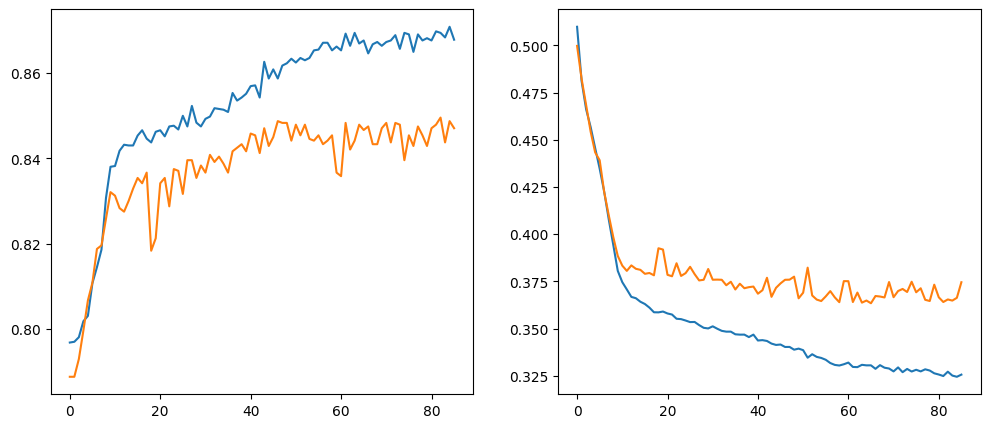

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
ax1.plot(model_history.history['accuracy'])
ax1.plot(model_history.history['val_accuracy'])
ax2.plot(model_history.history['loss'])
ax2.plot(model_history.history['val_loss'])

In [ ]:
Y_pred=model.predict(X_test)
Y_pred=(Y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


<Axes: >

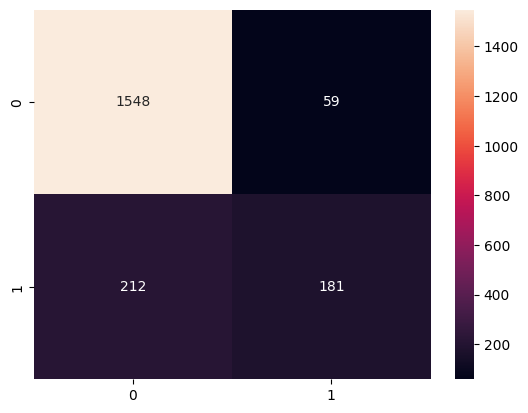

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
cm
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,Y_pred)
score

0.8645